In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10

In [3]:
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


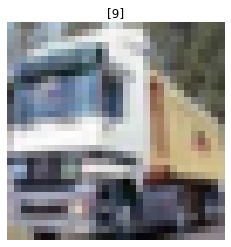

In [4]:
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(train_data[1])
plt.title(train_labels[1])
plt.show()

In [5]:
batch_size = 32
num_classes = 10
epochs = 1
data_augmentation = True
num_predictions = 20
model_name = 'cifar10_model.h5'
core = (6, 6)

In [6]:
y_train = keras.utils.to_categorical(train_labels, num_classes)
y_test = keras.utils.to_categorical(test_labels, num_classes)

In [7]:
x_train = train_data.astype('float32')
x_train /= 255

x_test = test_data.astype('float32')
x_test /= 255

In [8]:
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense

In [18]:
model = keras.Sequential()

# свёрточные слои
model.add(Conv2D(32, core, padding='same', input_shape=train_data.shape[1:]))
model.add(Activation(tf.nn.relu))
model.add(Conv2D(32, core))
model.add(Activation(tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, core, padding='same'))
model.add(Activation(tf.nn.relu))
model.add(Conv2D(64, core))
model.add(Activation(tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# полносвязные слои
model.add(Flatten())
model.add(Dense(512))
model.add(Activation(tf.nn.relu))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation(tf.nn.softmax))

model.compile(loss=tf.losses.CategoricalCrossentropy(), optimizer='SGD', metrics=['accuracy'])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Использование data augmentation в реальном времени
  ...
    to  
  ['...']
Train for 1563 steps, validate on 10000 samples
1563/1563 [==============================] - 365s 233ms/step - loss: 2.0747 - accuracy: 0.2208 - val_loss: 1.7906 - val_accuracy: 0.3432


In [20]:
#model.save(model_name)

In [21]:
model.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 13s 1ms/sample - loss: 1.7906 - accuracy: 0.3432


[1.790581753540039, 0.3432]

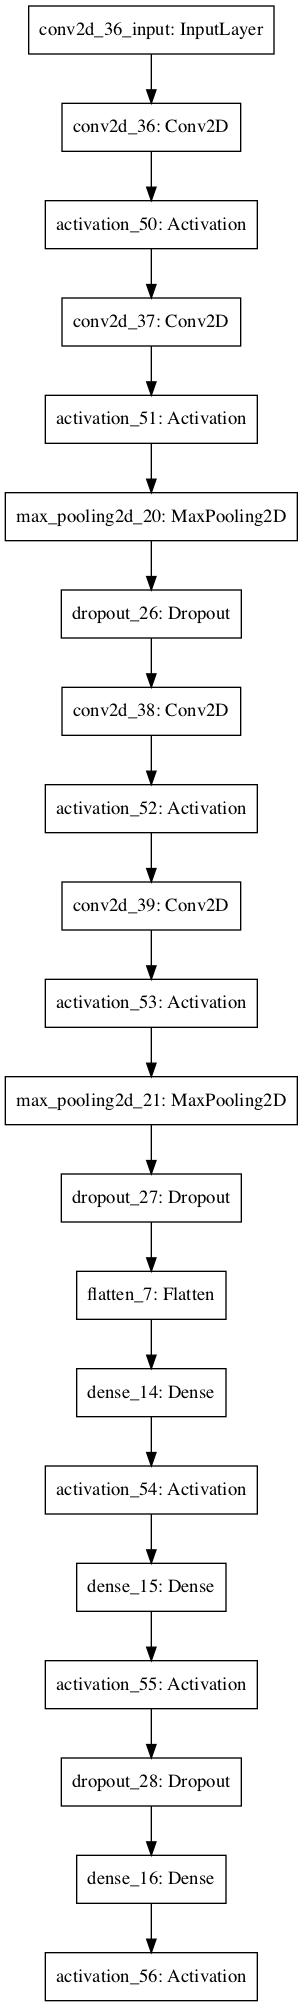

In [79]:
tf.keras.utils.plot_model(model)